# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

# Define column names for the dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the training dataset


In [4]:
data_train = pd.read_csv('/content/Housing_Train.csv', names=column_names, header=0)


# Display the first few rows of the dataset


In [5]:
print("Training Data Sample:")
print(data_train.head())

Training Data Sample:
       CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0   0.25199  0.0  10.59   0.0  0.489  5.783  72.7  4.3549    4  277     18.6   
1   0.62976  0.0   8.14   0.0  0.538  5.949  61.8  4.7075    4  307     21.0   
2   1.23247  0.0   8.14   0.0  0.538  6.142  91.7  3.9769    4  307     21.0   
3       NaN  0.0  18.10   1.0  0.631  6.683  96.8  1.3567   24  666     20.2   
4  12.80230  0.0  18.10   0.0  0.740  5.854  96.6  1.8956   24  666     20.2   

        B  LSTAT  MEDV  
0  389.43    NaN  22.5  
1  396.90   8.26  20.4  
2  396.90  18.72  15.2  
3  375.33   3.73  50.0  
4  240.52  23.79  10.8  


# Check for missing values


In [6]:
print("\nAny missing values in the training data:", data_train.isnull().values.any())



Any missing values in the training data: True


# Handle missing values (drop or fill with mean)

In [7]:
data_train.dropna(inplace=True)
data_train.fillna(data_train.mean(), inplace=True)

# Verify that no missing values remain


In [8]:
print("\nAny missing values after cleaning:", data_train.isnull().values.any())



Any missing values after cleaning: False


# Visualize the relationship between features and the target variable (MEDV)


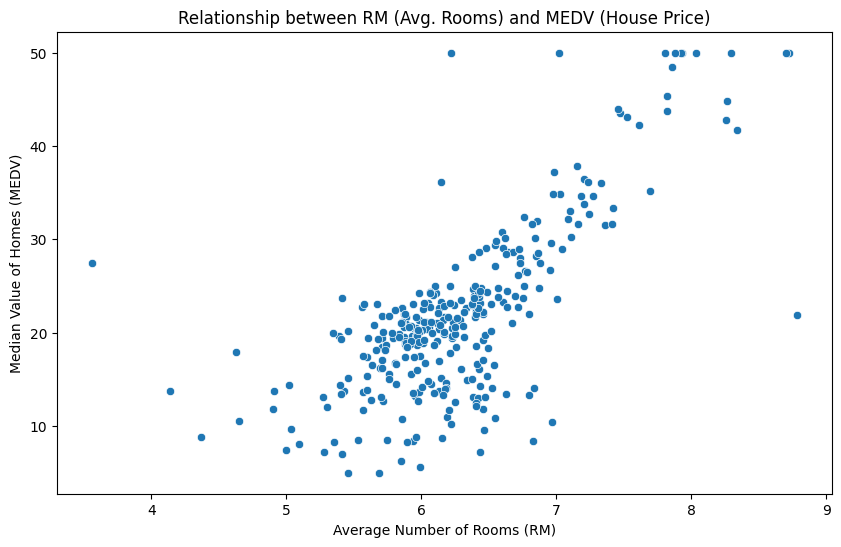

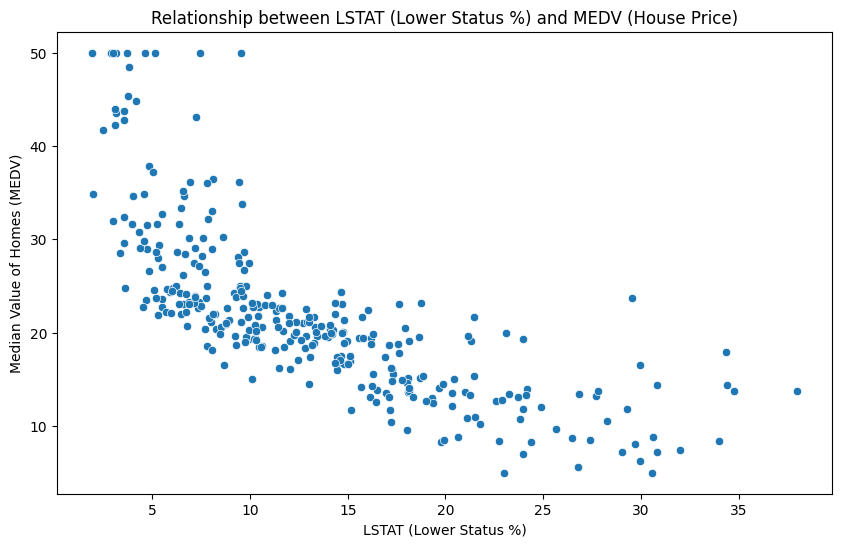

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='RM', y='MEDV')
plt.title('Relationship between RM (Avg. Rooms) and MEDV (House Price)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='LSTAT', y='MEDV')
plt.title('Relationship between LSTAT (Lower Status %) and MEDV (House Price)')
plt.xlabel('LSTAT (Lower Status %)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

# Heatmap of correlations


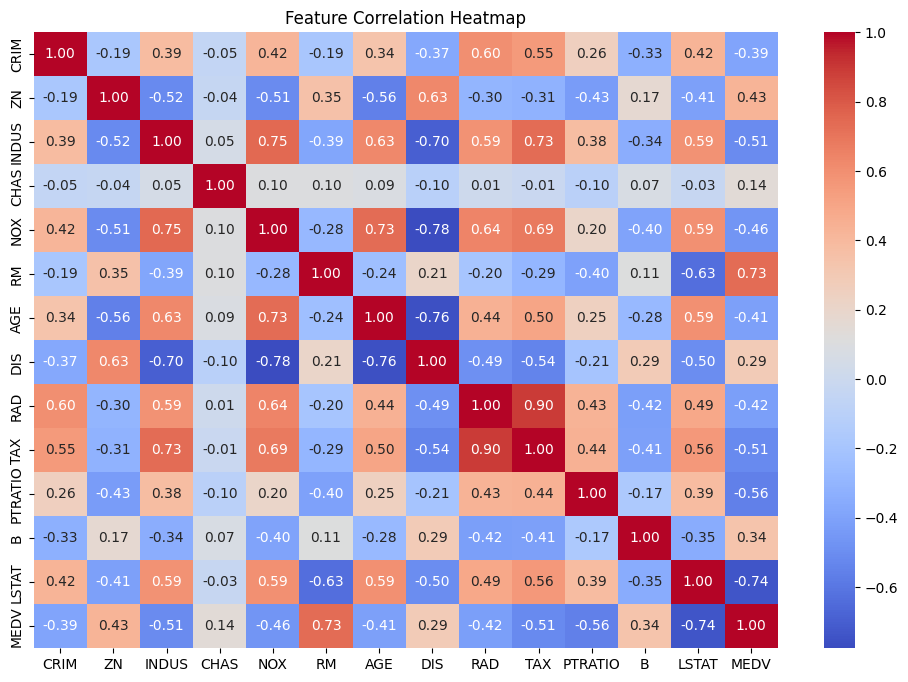

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = data_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Define a function to normalize features using z-score normalization


In [11]:
def zscore_normalize_features(X):
    """
    Normalize features using z-score normalization.

    Args:
        X (ndarray): Input data (m, n)

    Returns:
        X_norm (ndarray): Normalized data
    """
    mu = np.mean(X, axis=0)  # Mean of each column
    sigma = np.std(X, axis=0)  # Standard deviation of each column
    X_norm = (X - mu) / sigma
    return X_norm

# Select features and target variable


In [12]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

# Normalize the features


In [13]:
x_train = data_train[features]
y_train = data_train[target]
x_train = zscore_normalize_features(x_train)

# Add a bias term (intercept) to the features

In [14]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train]


# Define the cost function


In [15]:
def compute_cost(X, y, w):
    """
    Compute the cost function for linear regression.

    Args:
        X (ndarray): Input features (m, n)
        y (ndarray): Target values (m,)
        w (ndarray): Parameters (n,)

    Returns:
        float: Computed cost
    """
    m = X.shape[0]
    predictions = np.dot(X, w)
    errors = predictions - y
    cost = np.sum(errors ** 2) / (2 * m)
    return cost


# Define the gradient computation function


In [16]:
def compute_gradient(X, y, w):
    """
    Compute the gradients of the cost function with respect to the parameters.

    Args:
        X (ndarray): Input features (m, n)
        y (ndarray): Target values (m,)
        w (ndarray): Parameters (n,)

    Returns:
        ndarray: Gradients with respect to w
    """
    m = X.shape[0]
    predictions = np.dot(X, w)
    errors = predictions - y
    dj_dw = np.dot(X.T, errors) / m
    return dj_dw

# Define the gradient descent function

In [17]:
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Perform gradient descent to optimize the parameters.

    Args:
        X (ndarray): Input features (m, n)
        y (ndarray): Target values (m,)
        w (ndarray): Initial parameters (n,)
        alpha (float): Learning rate
        num_iters (int): Number of iterations

    Returns:
        ndarray: Optimized parameters
        list: History of cost values
    """
    cost_history = []
    for i in range(num_iters):
        gradients = compute_gradient(X, y, w)
        w = w - alpha * gradients
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
    return w, cost_history

# Initialize parameters


In [18]:
initial_w = np.zeros(x_train.shape[1])
alpha = 0.01
num_iters = 1000


# Perform gradient descent


In [19]:
w_final, cost_history = gradient_descent(x_train, y_train.values, initial_w, alpha, num_iters)


Iteration 0: Cost 276.0096
Iteration 100: Cost 43.1678
Iteration 200: Cost 14.4949
Iteration 300: Cost 10.5145
Iteration 400: Cost 9.8656
Iteration 500: Cost 9.6946
Iteration 600: Cost 9.6093
Iteration 700: Cost 9.5507
Iteration 800: Cost 9.5066
Iteration 900: Cost 9.4725


# Print final parameters


In [20]:
print("\nFinal parameters:")
print(w_final)



Final parameters:
[21.94317963 -0.98820691  0.92440283 -0.14155515  0.51942911 -1.58309766
  3.42460643 -0.63019702 -2.72912943  1.22983884 -1.14972331 -1.8793271
  0.94376293 -2.7461979 ]


# Define RMSE function


In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Make predictions on the training set


In [22]:
y_pred_train = np.dot(x_train, w_final)

# Calculate RMSE


In [23]:
train_rmse = rmse(y_train, y_pred_train)
print(f"\nTraining RMSE: {train_rmse:.4f}")


Training RMSE: 4.3465


# Define column names for the dataset for test

In [25]:
column_names_test = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Load test data


In [26]:
data_test = pd.read_csv('/content/Housing_Test.csv', names=column_names_test, header=0)


# Handle missing values

In [27]:
data_test.fillna(data_test.mean(), inplace=True)


# Prepare test features


In [29]:
x_test = data_test[features]
# y_test = data_test[target]
x_test = zscore_normalize_features(x_test)
x_test = np.c_[np.ones(x_test.shape[0]), x_test]


# Make predictions on the test set

In [30]:
y_pred_test = np.dot(x_test, w_final)

# Save predictions to a CSV file


In [31]:
output = pd.DataFrame({'Predicted_MEDV': y_pred_test})
output.to_csv('/content/house_pred.csv', index=False)
print("\nPredictions saved to 'house_pred.csv'")


Predictions saved to 'house_pred.csv'
